# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных диабета — https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html.

Для каждого из n=442 пациентов с диабетом были получены десять исходных переменных, возраст, пол, индекс массы тела, среднее кровяное давление и шесть измерений сыворотки крови, а также интересующий ответ, количественная мера прогрессирования заболевания через год после исходного уровня.

Набор данных состоит из следующих атрибутов:
- age (возраст)
- sex (пол)
- bmi (индекс массы тела)
- bp (среднее кровяное давление)
- s1 tc (общий холестерин сыворотки)
- s2 ldl (липопротеины низкой плотности)
- s3 hdl (липопротеины высокой плотности)
- s4 tch (общий холестерин)
- s5 ltg (логарифм уровня триглицеридов в сыворотке)
- s6 glu (уровень сахара в крови)

Каждая из этих 10 переменных характеристик была центрирована по среднему значению и масштабирована по стандартному отклонению, умноженному на квадратный корень из n_samples (т. е. сумма квадратов каждого столбца составляет 1).

Столбец 11 — количественная мера прогрессирования заболевания через год после исходного уровня

# Импорт библиотек
Импортируем библиотеки с помощью команды import.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Загрузка наборов данных Scikit-learn.

In [14]:
diabet = load_diabetes()

In [17]:
data = pd.DataFrame(data= np.c_[diabet['data'], diabet['target']],
                     columns= diabet['feature_names'] + ['target'])

# 2) Основные характеристики датасета

In [19]:
# Первые 5 строк датасета
data.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [20]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(442, 11)

In [21]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 442


In [22]:
# Список колонок
data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [23]:
# Список колонок с типами данных
data.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [24]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
sex - 0
bmi - 0
bp - 0
s1 - 0
s2 - 0
s3 - 0
s4 - 0
s5 - 0
s6 - 0
target - 0


In [25]:
# Основные статистические характеристки набора данных
data.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

In [26]:
# Определим уникальные значения для целевого признака
data['target'].unique()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144., 168.,  68.,  49., 245.,
       184., 202., 137.,  85., 131., 283., 129.,  59., 341.,  87.,  65.,
       102., 265., 276., 252.,  90., 100.,  55.,  61.,  92., 259.,  53.,
       190., 142., 155., 225., 104., 182., 128.,  52.,  37., 170.,  71.,
       163., 150., 160., 178.,  48., 270., 111.,  42., 200., 113., 143.,
        51., 210., 134.,  98., 164.,  96., 162., 279.,  83., 302., 198.,
        95., 232.,  81., 246., 297., 258., 229., 275., 281., 173., 180.,
        84., 121., 161.,  99., 109., 115., 268., 274., 158., 107., 103.,
       272., 280., 336., 317., 235.,  60., 174., 126., 288.,  88., 292.,
       197., 186.,  25., 195., 217., 172., 214.,  70., 220., 152.,  47.,
        74., 295., 127., 237.,  64.,  79.,  91., 116.,  86., 122.,  72.,
        39., 196., 222., 277.,  77., 191.,  73., 263., 248., 296.,  78.,
        93., 208., 108., 154., 124.,  67., 257., 26

# 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

## Диаграмма рассеяния

<Axes: xlabel='bmi', ylabel='age'>

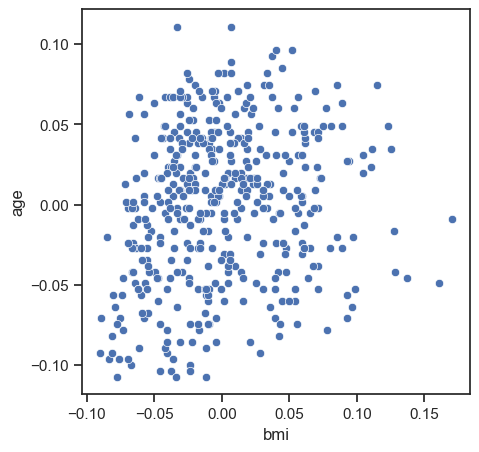

In [33]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='bmi', y='age', data=data)

Посмотрим насколько на эту зависимость влияет целевой признак.

<Axes: xlabel='bmi', ylabel='age'>

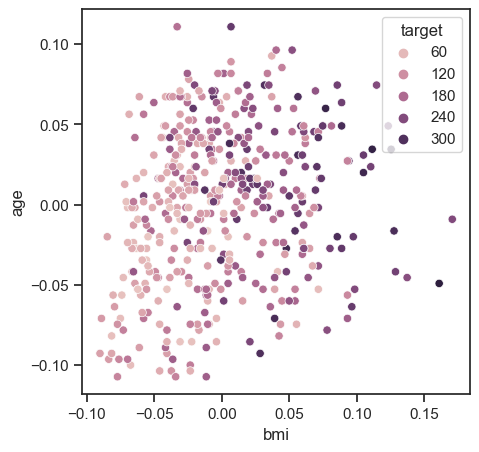

In [34]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='bmi', y='age', data=data, hue='target')

## Гистограмма
Позволяет оценить плотность вероятности распределения данных.

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5268\3826631437.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

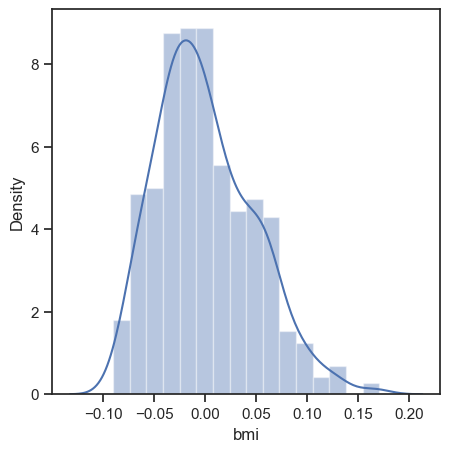

In [44]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(data['bmi'])

## Jointplot
Комбинация гистограмм и диаграмм рассеивания.

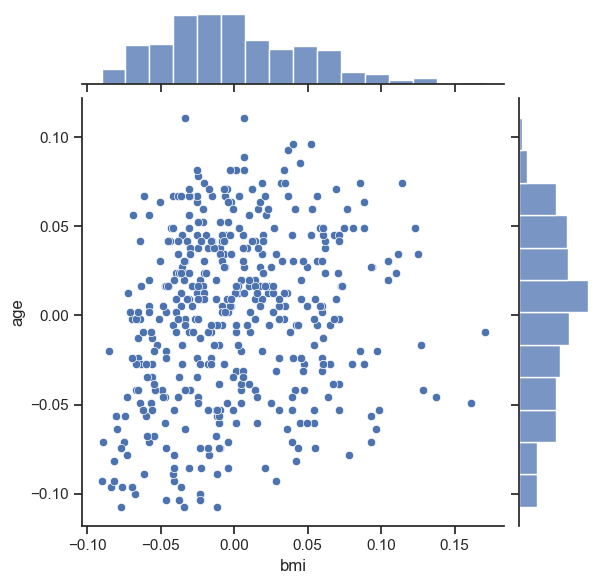

In [45]:
sns.jointplot(x='bmi', y='age', data=data)

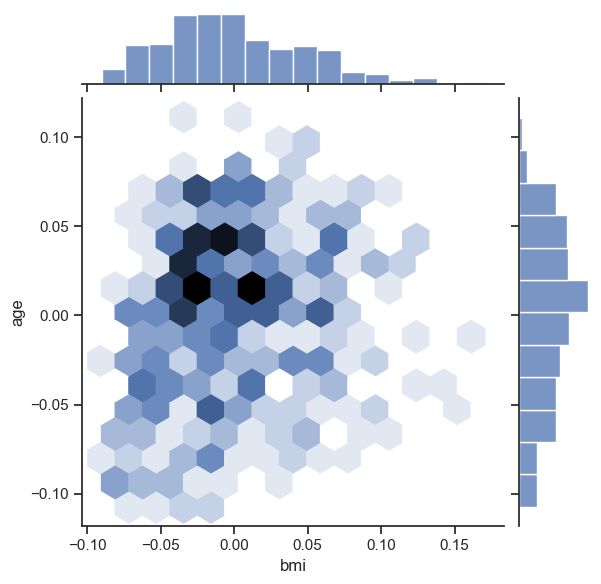

In [46]:
sns.jointplot(x='bmi', y='age', data=data, kind="hex")

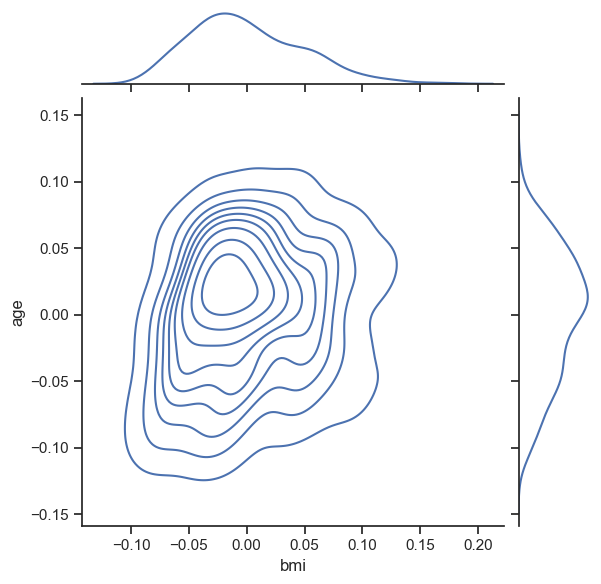

In [47]:
sns.jointplot(x='bmi', y='age', data=data, kind="kde")

## "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

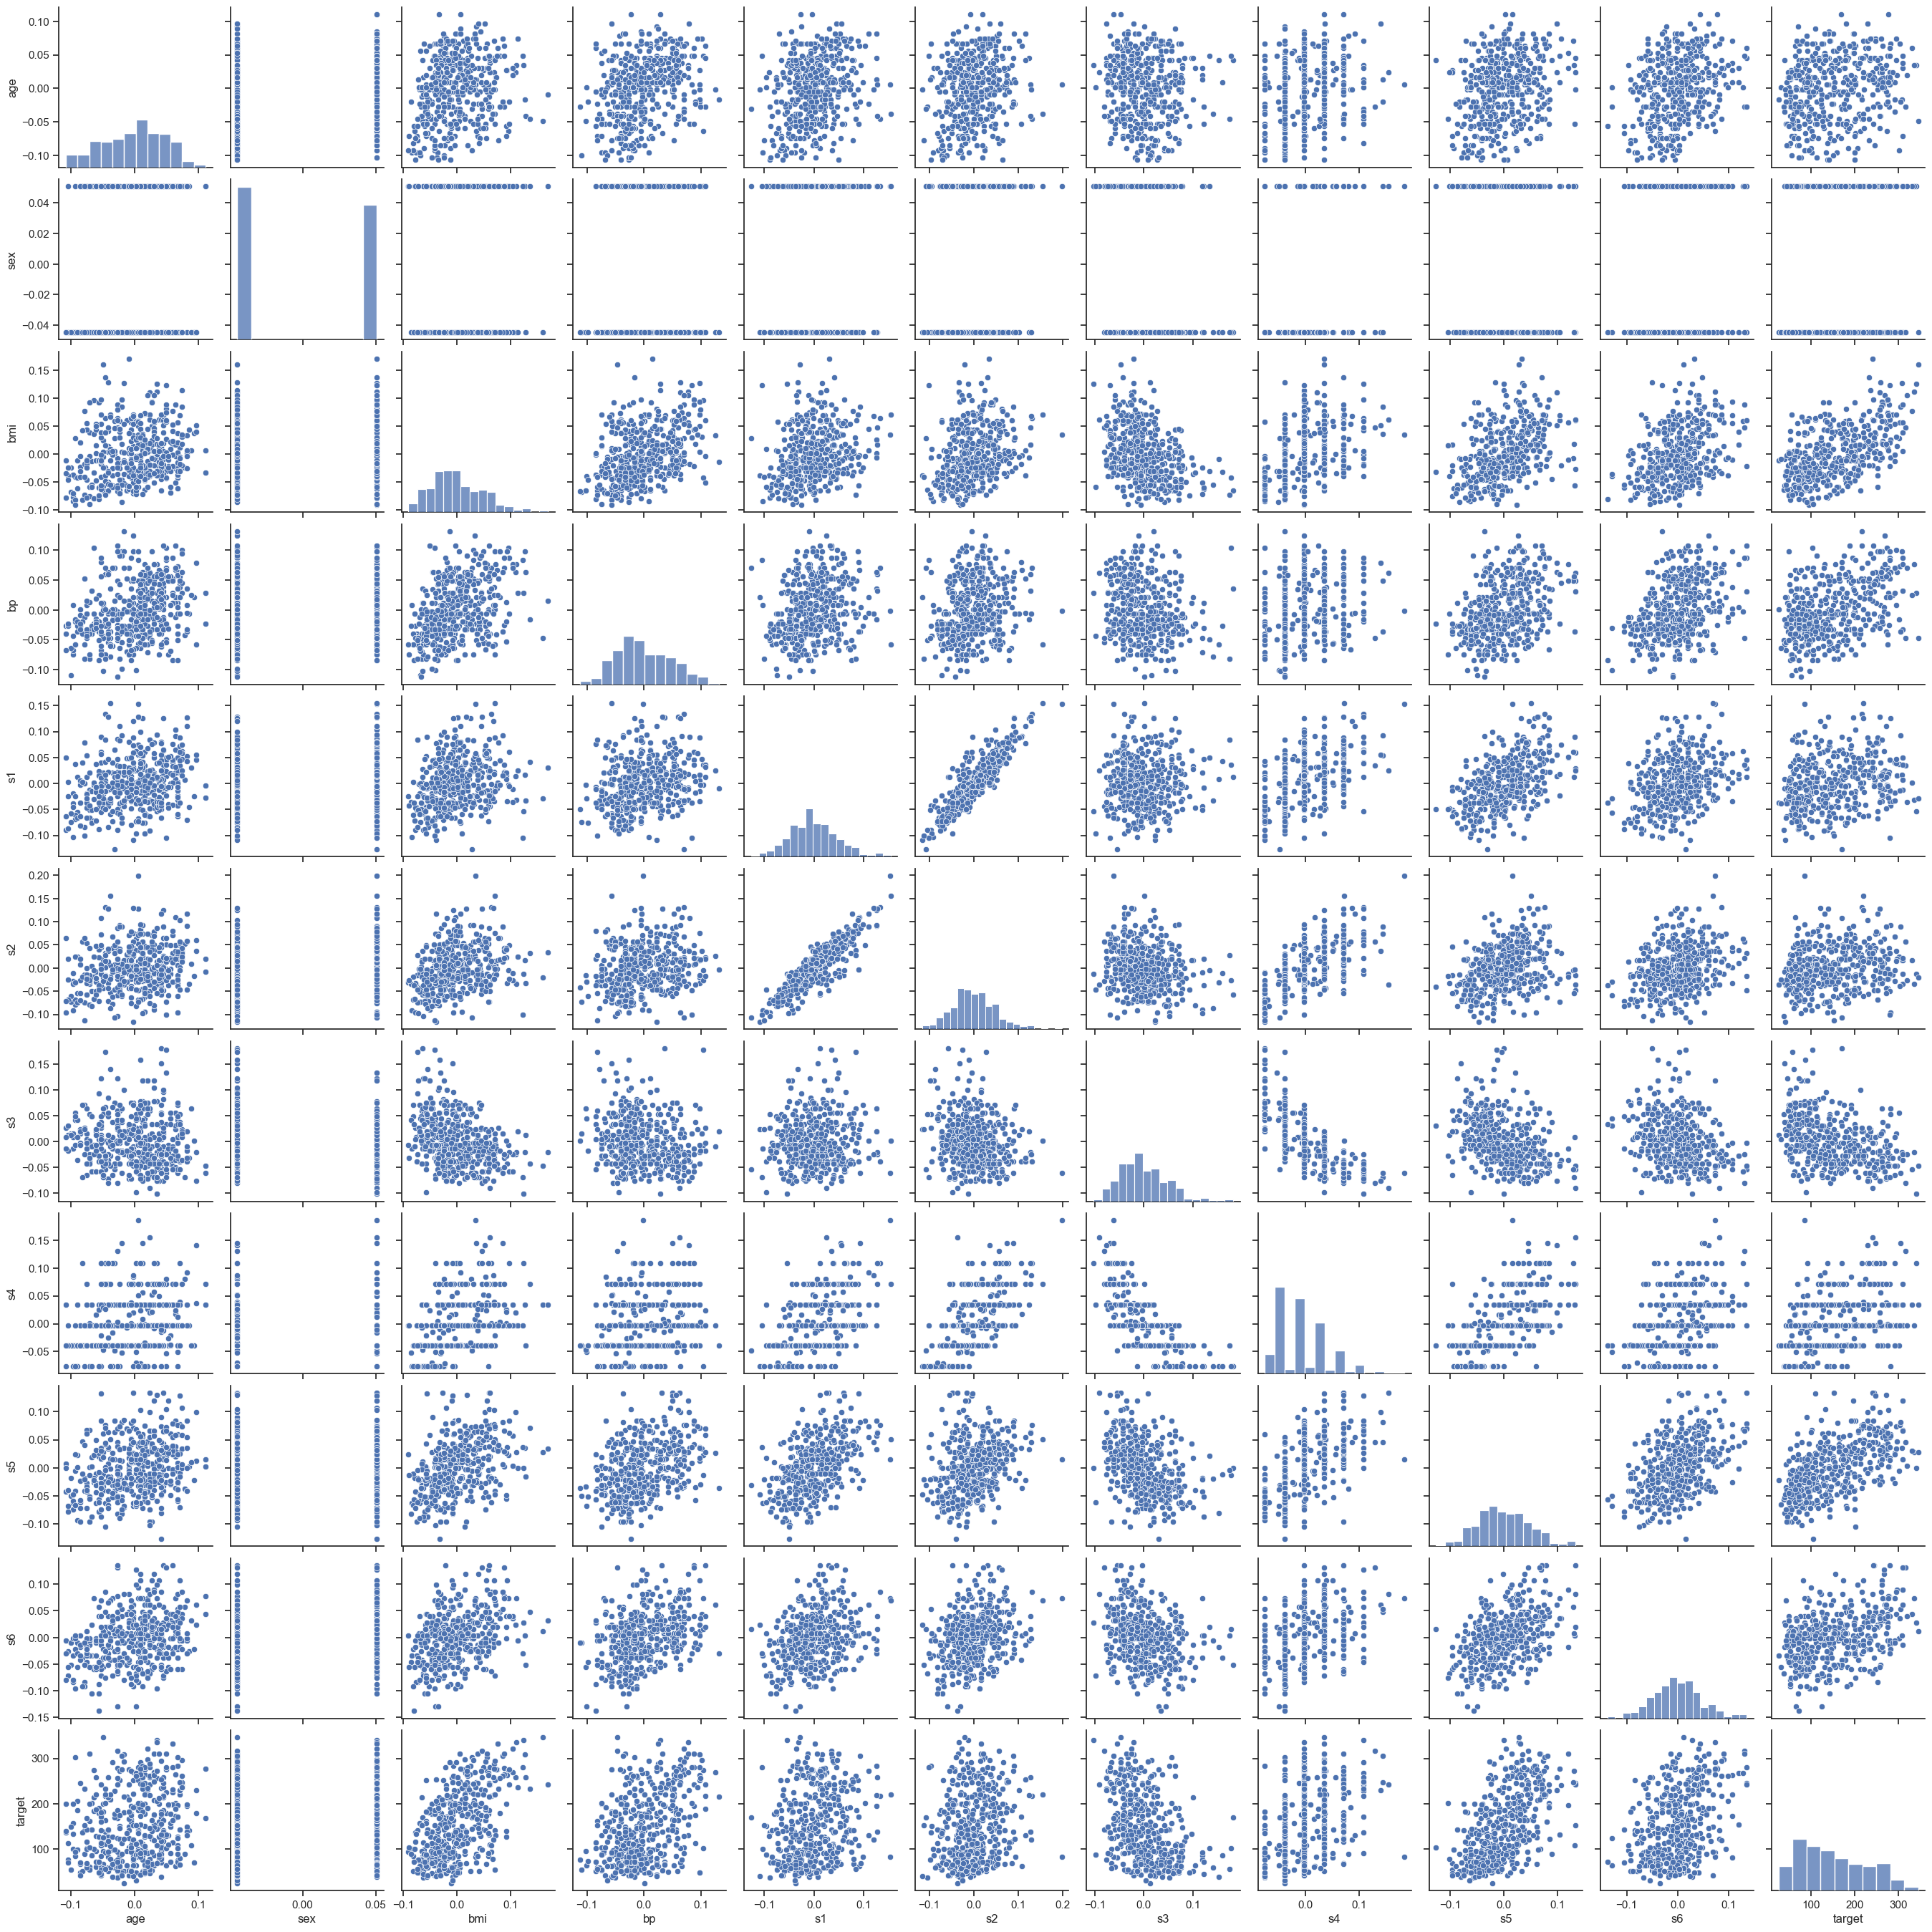

In [48]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

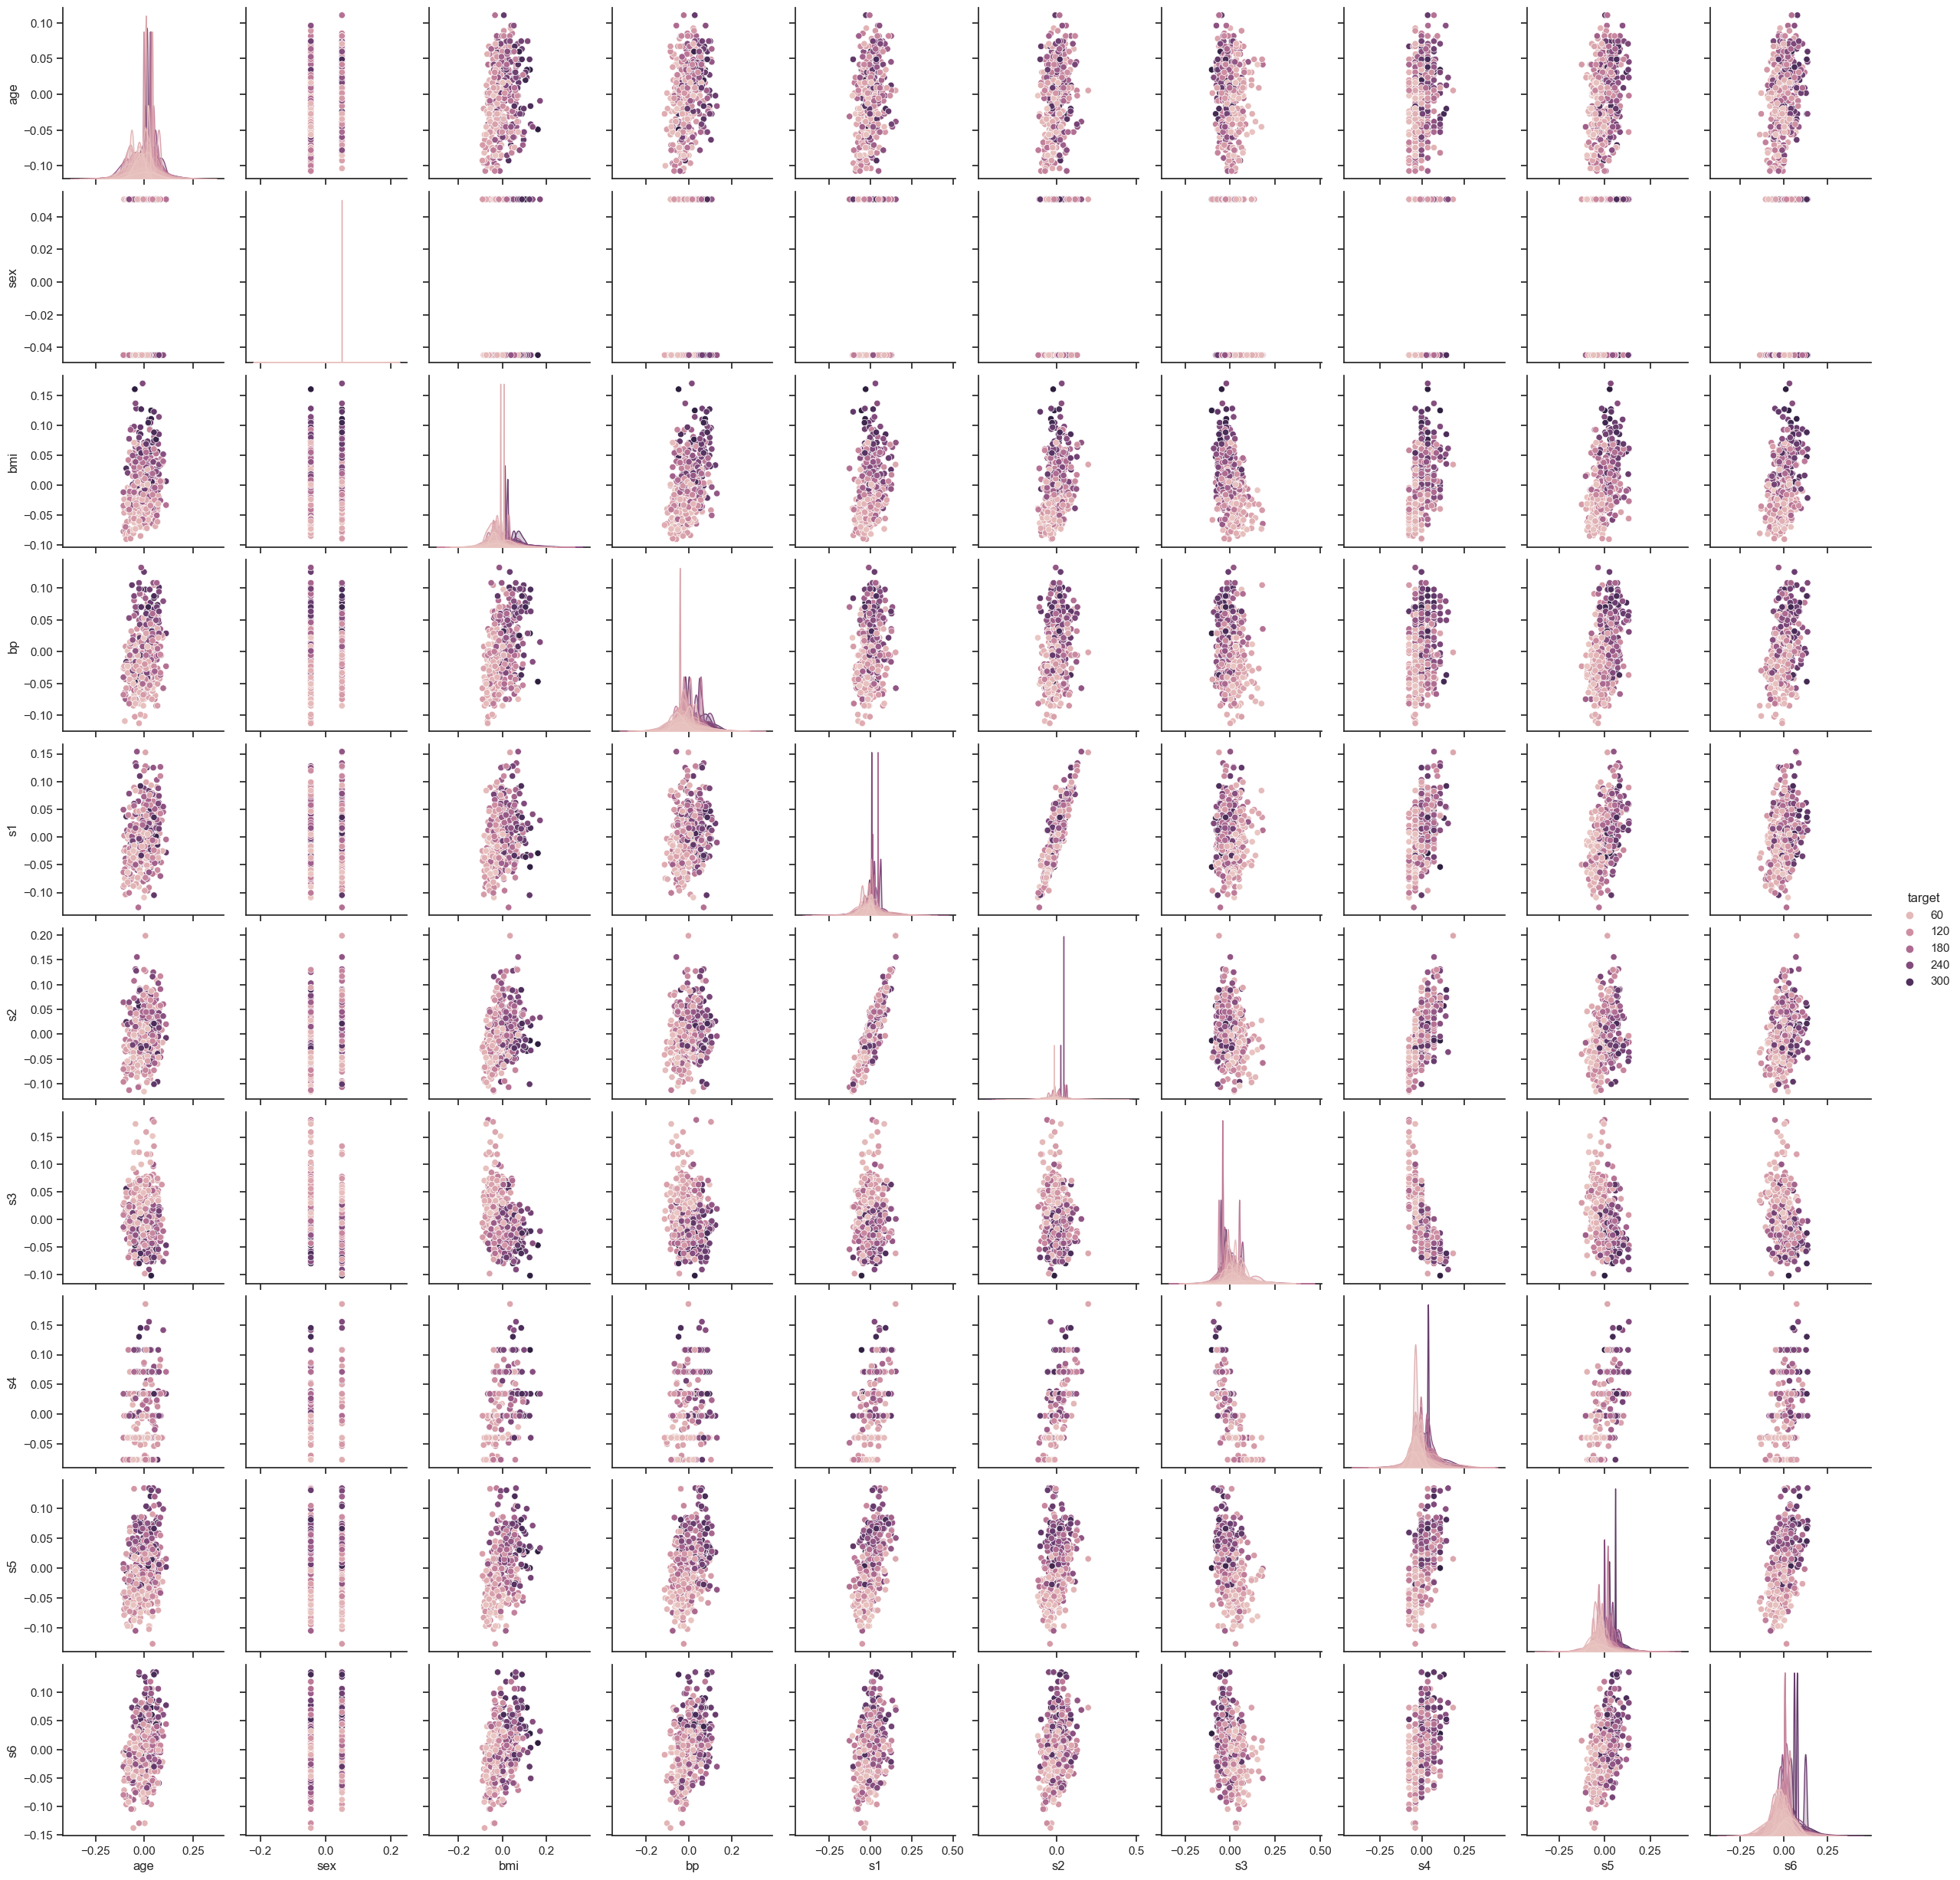

In [49]:
sns.pairplot(data, hue="target")

## Ящик с усами
Отображает одномерное распределение вероятности.

<Axes: xlabel='age'>

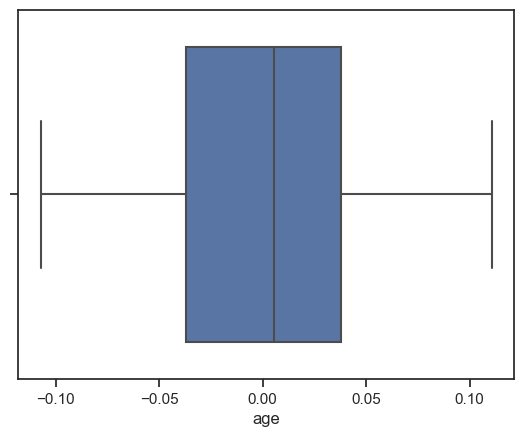

In [50]:
sns.boxplot(x=data['age'])

<Axes: ylabel='age'>

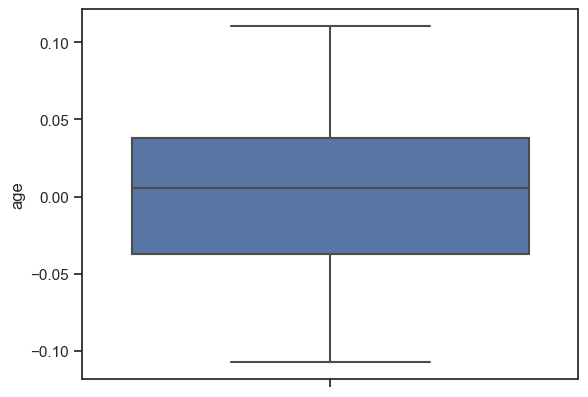

In [51]:
# По вертикали
sns.boxplot(y=data['age'])

## Violin plot
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности

<Axes: xlabel='age'>

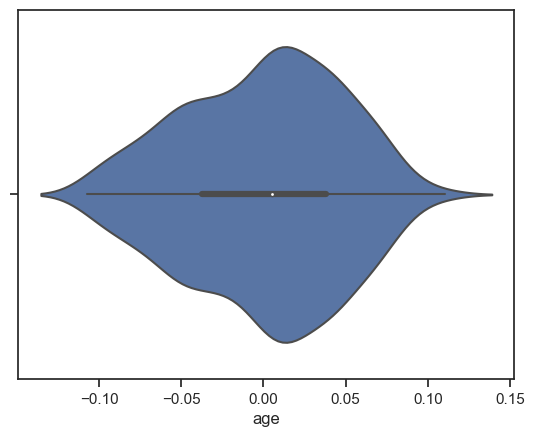

In [53]:
sns.violinplot(x=data['age'])

C:\Users\Huawei\AppData\Local\Temp\ipykernel_5268\1663298551.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], ax=ax[1])


<Axes: xlabel='age', ylabel='Density'>

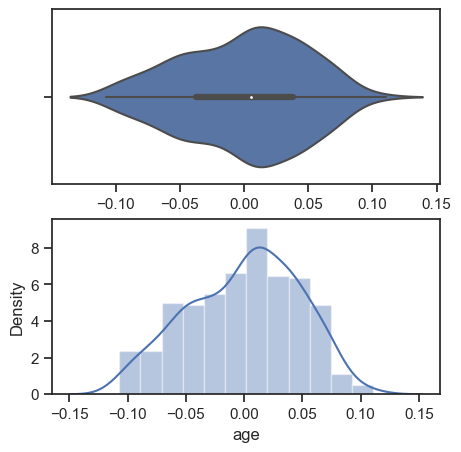

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(5,5))
sns.violinplot(ax=ax[0], x=data['age'])
sns.distplot(data['age'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

# 4) Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
2. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [55]:
data.corr()

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6    target  
age     0.203841  0.270774  0.301731  0.187889  
sex     0.332115  0.149916  0.208133  0.043062  
bmi     0.413807  0.446157  0.388680  0.586450  
bp      0.257650  0.393480  0.390430  0.441482  
s1      0.542207  0.515503  0.325717  0.212022  
s2      0.659817  0.318357  0.290600  0.174054  
s3     -0.738493 -0.398577 -0.273697 -0.394789  
s4      1.000000  0.617859  0.417212  0.430453  
s5      0.617859  1.000000  0.464669  0.565883  
s6      0.417212  0.464669  1.000000  0.382483  
target  0.430453  0.565883  0.382483  1.000000

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

- Целевой признак отчасти коррелирует с bmi(индексом массы тела) (0.59) и s5(логарифмом уровня триглицеридов в сыворотке) (0.57). Этоти признаки стоит оставить в модели.
- Целевой признак не коррелирует с s3(липопротеинами высокой плотности) (-0.39). Этот признак стоит исключить из модели, возможно он только ухудшит качество модели.
- s1(общий холестерин сыворотки) и s2(липопротеинами низкой плотности) сильно коррелируют между собой (0.9). Поэтому из этих признаков в модели лучше оставлять только один.
- Также можно сделать вывод, что выбирая из признаков s1 и s2 лучше выбрать s1, потому что он сильнее коррелирован с целевым признаком. Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее. Но для этой пары признаков этот вывод нельзя считать надежным, потому что и 0.21 и 0.17 являются довольно малыми величинами.

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [56]:
data.corr(method='pearson')

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6    target  
age     0.203841  0.270774  0.301731  0.187889  
sex     0.332115  0.149916  0.208133  0.043062  
bmi     0.413807  0.446157  0.388680  0.586450  
bp      0.257650  0.393480  0.390430  0.441482  
s1      0.542207  0.515503  0.325717  0.212022  
s2      0.659817  0.318357  0.290600  0.174054  
s3     -0.738493 -0.398577 -0.273697 -0.394789  
s4      1.000000  0.617859  0.417212  0.430453  
s5      0.617859  1.000000  0.464669  0.565883  
s6      0.417212  0.464669  1.000000  0.382483  
target  0.430453  0.565883  0.382483  1.000000

In [57]:
data.corr(method='kendall')

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.146580  0.136535  0.242111  0.182220  0.153612 -0.073846   
sex     0.146580  1.000000  0.080424  0.215733  0.022809  0.110208 -0.326188   
bmi     0.136535  0.080424  1.000000  0.281770  0.194171  0.198583 -0.249831   
bp      0.242111  0.215733  0.281770  1.000000  0.188067  0.140253 -0.131014   
s1      0.182220  0.022809  0.194171  0.188067  1.000000  0.717229  0.010695   
s2      0.153612  0.110208  0.198583  0.140253  0.717229  1.000000 -0.133332   
s3     -0.073846 -0.326188 -0.249831 -0.131014  0.010695 -0.133332  1.000000   
s4      0.160898  0.297335  0.335625  0.205948  0.393367  0.503579 -0.638633   
s5      0.180544  0.143172  0.344720  0.268863  0.356268  0.242250 -0.311775   
s6      0.201784  0.168199  0.266373  0.264566  0.227139  0.194082 -0.200545   
target  0.130709  0.030630  0.391195  0.289352  0.154016  0.129665 -0.278884   

              s4        s5        s6    target  
age     0.160898  0.180544  0.201784  0.130709  
sex     0.297335  0.143172  0.168199  0.030630  
bmi     0.335625  0.344720  0.266373  0.391195  
bp      0.205948  0.268863  0.264566  0.289352  
s1      0.393367  0.356268  0.227139  0.154016  
s2      0.503579  0.242250  0.194082  0.129665  
s3     -0.638633 -0.311775 -0.200545 -0.278884  
s4      1.000000  0.485410  0.307397  0.324734  
s5      0.485410  1.000000  0.316235  0.408988  
s6      0.307397  0.316235  1.000000  0.239051  
target  0.324734  0.408988  0.239051  1.000000

In [58]:
data.corr(method='spearman')

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.177463  0.200554  0.350859  0.262524  0.221711 -0.106973   
sex     0.177463  1.000000  0.098079  0.261508  0.027790  0.134695 -0.394584   
bmi     0.200554  0.098079  1.000000  0.397985  0.287829  0.295494 -0.371172   
bp      0.350859  0.261508  0.397985  1.000000  0.275224  0.205638 -0.191033   
s1      0.262524  0.027790  0.287829  0.275224  1.000000  0.878793  0.015308   
s2      0.221711  0.134695  0.295494  0.205638  0.878793  1.000000 -0.197435   
s3     -0.106973 -0.394584 -0.371172 -0.191033  0.015308 -0.197435  1.000000   
s4      0.221017  0.337524  0.459068  0.280799  0.520674  0.652283 -0.789694   
s5      0.265176  0.174625  0.491609  0.396071  0.512864  0.349947 -0.450420   
s6      0.296235  0.203277  0.384664  0.381219  0.332173  0.286483 -0.290863   
target  0.197822  0.037401  0.561382  0.416241  0.232429  0.195834 -0.410022   

              s4        s5        s6    target  
age     0.221017  0.265176  0.296235  0.197822  
sex     0.337524  0.174625  0.203277  0.037401  
bmi     0.459068  0.491609  0.384664  0.561382  
bp      0.280799  0.396071  0.381219  0.416241  
s1      0.520674  0.512864  0.332173  0.232429  
s2      0.652283  0.349947  0.286483  0.195834  
s3     -0.789694 -0.450420 -0.290863 -0.410022  
s4      1.000000  0.640390  0.413700  0.448931  
s5      0.640390  1.000000  0.453023  0.589416  
s6      0.413700  0.453023  1.000000  0.350792  
target  0.448931  0.589416  0.350792  1.000000

В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn.

<Axes: >

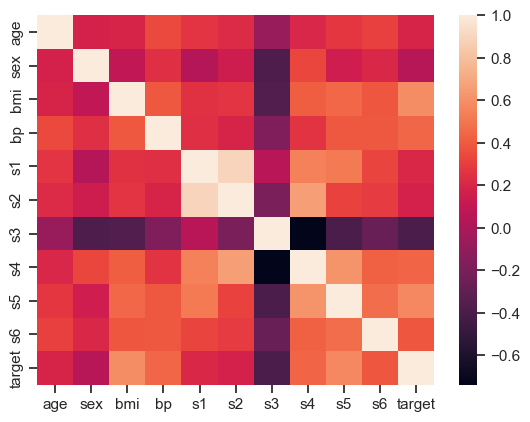

In [59]:
sns.heatmap(data.corr())

<Axes: >

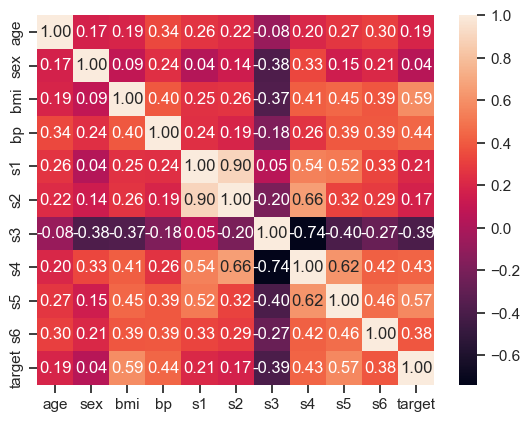

In [61]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.2f')

<Axes: >

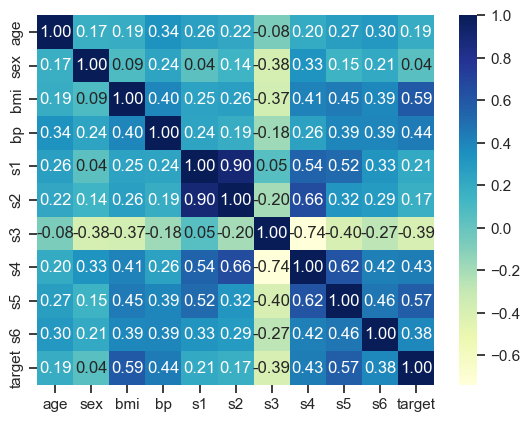

In [62]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

<Axes: >

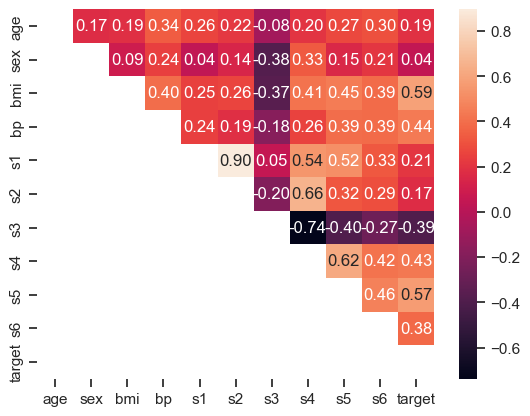

In [65]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool_)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.2f')

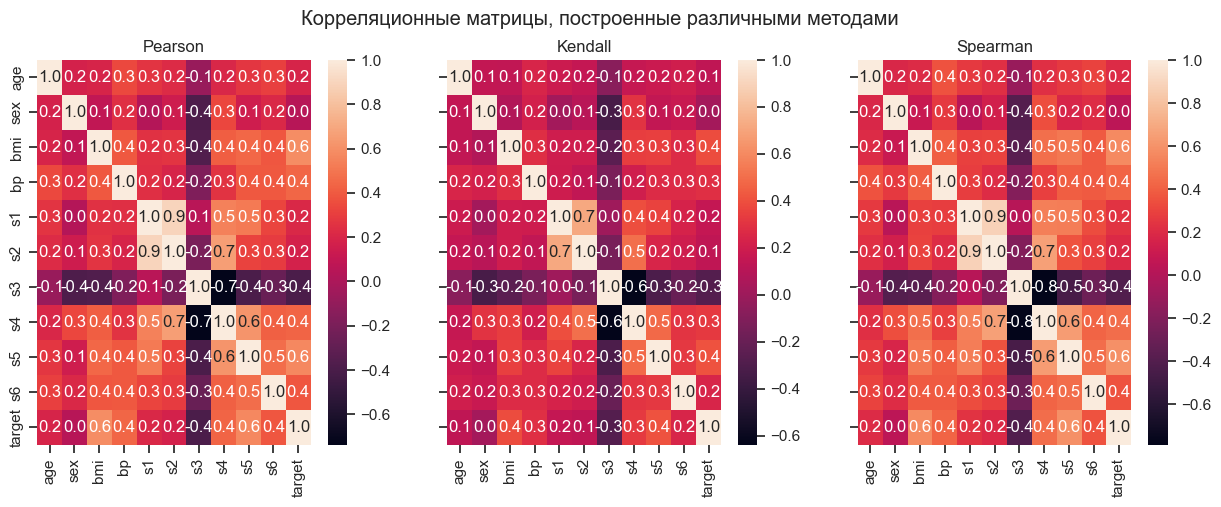

In [67]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

## Тепловая карта с указанием размера

<Axes: >

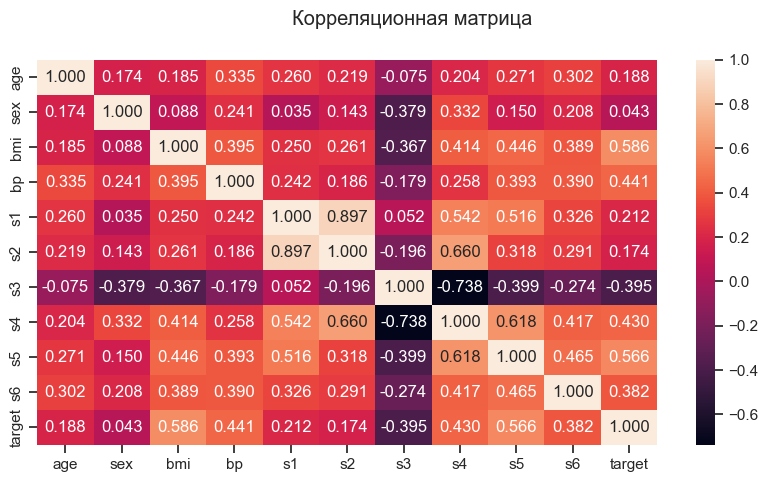

In [69]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')